# All steps to reproduce the Process of Hierarchical Regression Analysis

In [1]:
%%capture
%run 'main.py'

# importando o pyplot
from matplotlib import pyplot
# importando o stats 
from scipy import stats

## 1. Dataset

In [2]:
# 1. Tabela de Métricas
df_all_metrics.head(3)

,uniqueID,ID,location,maturity,totalDevelopers,complexityPoints,start,end,leadTime,technicalDebt,taskScaling,taskGlobalDistance
0,14187,t1,India,4.0,13.0,60.0,2014-08-11 00:00:00,2015-02-06 00:00:00,179.0,796.0,0.216667,1.250000
1,15448,b1b3,Virtual,4.0,25.0,170.0,2015-01-19 00:00:00,2015-06-05 00:00:00,137.0,2474.0,0.147059,6.244748
2,13350,tl1,India,4.0,7.0,35.0,2015-02-09 00:00:00,2015-04-02 00:00:00,52.0,202.0,0.200000,3.463991


## 2. Box-plot about TD values group by located

Text(0.5,1,'Boxplot Distribuition Technical Debt x Location')

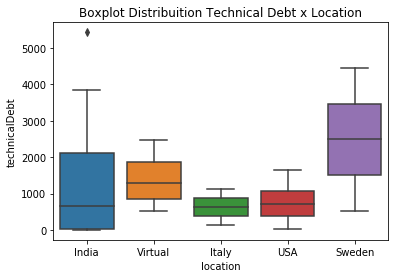

In [3]:
sns.boxplot(x='location', y='technicalDebt', data=df_all_metrics).set_title('Boxplot Distribuition Technical Debt x Location')

## 3. Check correlations among factors and TD

### Correlation Matrix

In [4]:
df_all_metrics.corr().round(4)

,uniqueID,maturity,totalDevelopers,complexityPoints,leadTime,technicalDebt,taskScaling,taskGlobalDistance
uniqueID,1.0000,-0.1308,-0.0864,0.0430,-0.1769,0.0258,0.0525,0.3865
maturity,-0.1308,1.0000,0.3162,-0.2918,0.0119,-0.0476,0.5259,0.2134
totalDevelopers,-0.0864,0.3162,1.0000,0.2966,0.5913,0.3433,0.0765,0.2219
complexityPoints,0.0430,-0.2918,0.2966,1.0000,0.3300,0.6088,-0.4695,-0.2742
leadTime,-0.1769,0.0119,0.5913,0.3300,1.0000,0.4088,-0.2425,-0.1703
technicalDebt,0.0258,-0.0476,0.3433,0.6088,0.4088,1.0000,-0.4190,-0.0258
taskScaling,0.0525,0.5259,0.0765,-0.4695,-0.2425,-0.4190,1.0000,0.2017
taskGlobalDistance,0.3865,0.2134,0.2219,-0.2742,-0.1703,-0.0258,0.2017,1.0000


### Testing Linearity: Scatter Plot

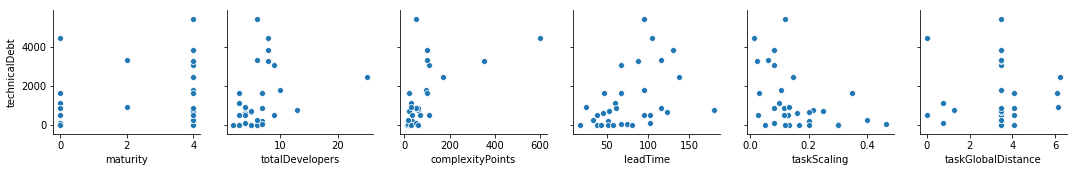

In [5]:
ax = sns.pairplot(df_all_metrics, y_vars='technicalDebt', x_vars=['maturity', 'totalDevelopers', 'complexityPoints', 
                                                                  'leadTime', 'taskScaling', 'taskGlobalDistance'])
ax.fig.suptitle('', fontsize=20, y=1.05)
ax

### Spearman's Coeficient

In [6]:
arrayTechnicalDebt = df_all_metrics.technicalDebt.values

arrayLeadTime = df_all_metrics.leadTime.values
print("Lead Time x Technical Debt")
print(stats.spearmanr(arrayLeadTime, arrayTechnicalDebt))
print("")

arrayComplexityPoints = df_all_metrics.complexityPoints.values
print("Task Complexity x Technical Debt")
print(stats.spearmanr(arrayComplexityPoints, arrayTechnicalDebt))
print("")

arrayTotalDevelopers = df_all_metrics.totalDevelopers.values
print("Total Developers x Technical Debt")
print(stats.spearmanr(arrayTotalDevelopers, arrayTechnicalDebt))
print("")

arrayTaskScaling = df_all_metrics.taskScaling.values
print("Task Scaling x Technical Debt")
print(stats.spearmanr(arrayTaskScaling, arrayTechnicalDebt))

Lead Time x Technical Debt
SpearmanrResult(correlation=0.48587185407612227, pvalue=0.004814195878751078)

Task Complexity x Technical Debt
SpearmanrResult(correlation=0.6498748363481108, pvalue=5.689214652268194e-05)

Total Developers x Technical Debt
SpearmanrResult(correlation=0.5049990019693433, pvalue=0.0032000488729230416)

Task Scaling x Technical Debt
SpearmanrResult(correlation=-0.43922598272476504, pvalue=0.011900668916364508)


In [7]:
# Dictionary with set of variables
my_dict = {0:'technicalDebt', 1:'leadTime', 2:'complexityPoints', 
           3:'totalDevelopers',4:'taskScaling', 5:'maturity', 6:'taskGlobalDistance'}

# Independent variable
y = df_all_metrics.technicalDebt

# Dependents variables
X = df_all_metrics[[my_dict[1], my_dict[2], my_dict[3], my_dict[4]]]

## 4. Testing Normality

<p>
The normal distribution of residuals is tested by visually checking the normal P-P plot. The points on the plot remain close to the diagonal line, which means residuals are normally distributed. So, we do not violate the assumption of normality.
</p>

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


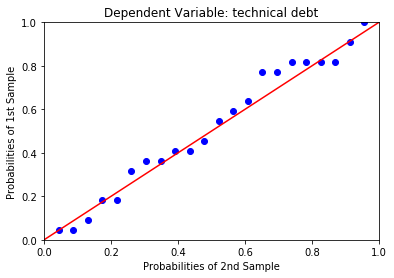

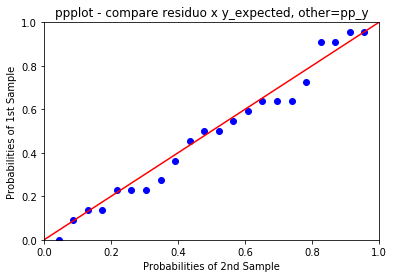

In [8]:
import statsmodels.api as sm
from matplotlib import pyplot as plt
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

# print("Creating the dataset of train and test")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

#Linear regression
modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_previsto_train = modelo.predict(X_train)

residuo = y_train - y_previsto_train

tn_x = residuo.values 
tn_y = y_previsto_train

pp_x = sm.ProbPlot(tn_x, fit=True)
pp_y = sm.ProbPlot(tn_y, fit=True)

fig = pp_y.ppplot(line='45', other=pp_x)
h = plt.title('Dependent Variable: technical debt')

fig = pp_x.ppplot(line='45', other=pp_y)
h = plt.title('ppplot - compare residuo x y_expected, other=pp_y')
plt.show()

## 5. No auto-correlation

### Durbin_Watson

In [9]:
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.stattools import durbin_watson

import numpy as np

def dw(data):
    ols_res = OLS(data, np.ones(len(data))).fit()
    return durbin_watson(ols_res.resid)

#print("dw of range=%f technicalDebt" % dw(df_all_metrics.technicalDebt.values))

for each in range(0,5):
    print("dw of " + my_dict[each] + " is", dw(df_all_metrics[my_dict[each]].values).round(3))
    
    my_array_dw = np.array([
    [2.041],
	[1.614], 
	[2.155], 
	[1.23], 
	[1.727]
	])
my_index_dw = ['technical debt', 'lead time', 'task complexity', 'total Developers', 'task Scaling']
my_columns_dw = ['value']

df_my_dw = pd.DataFrame(data=my_array_dw , index=my_index_dw , columns=my_columns_dw)
df_my_dw    

dw of technicalDebt is 2.041
dw of leadTime is 1.614
dw of complexityPoints is 2.155
dw of totalDevelopers is 1.23
dw of taskScaling is 1.727


,value
technical debt,2.041
lead time,1.614
task complexity,2.155
total Developers,1.230
task Scaling,1.727


## 6. Testing Homescedascity

In [10]:
# Breusch-Pagan Test

# import smf to process regression model
import statsmodels.formula.api as smf

# 1. Data (y, x1, x2, x3, x4)
my_df_tm_modelo = df_all_metrics[[my_dict[0], my_dict[1], my_dict[2], my_dict[3], my_dict[4]]]
df_bp = my_df_tm_modelo[['technicalDebt', 'leadTime', 'complexityPoints', 'totalDevelopers', 'taskScaling']]

# 2. fit regression model
fit = smf.ols('technicalDebt ~ leadTime+complexityPoints+totalDevelopers+taskScaling', data=df_bp).fit()

#fit.summary()

print("Perform a Breusch-Pagan test.")

# import lzip and sms
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']

# 3. perform Bresuch-Pagan test 
test = sms.het_breuschpagan(fit.resid, fit.model.exog)

lzip(names, test)

Perform a Breusch-Pagan test.


[('Lagrange multiplier statistic', 2.3261542987377517),
 ('p-value', 0.6760114026390507),
 ('f-value', 0.5291373984536129),
 ('f p-value', 0.7152904901671338)]

<h3> A Breusch-Pagan test uses the following null and alternative hypotheses: </h3>

<p>
 The null hypothesis (H0): Homoscedasticity is present.  
    
 The alternative hypothesis: (Ha): Homoscedasticity is not present (i.e. heteroscedasticity exists)


 In this dataset, the Lagrange multiplier statistic for the test is 2.326 
 and the corresponding p-value is 0.676. 
 Because this p-value is not less than 0.05, we fail to reject the null hypothesis. 
</p>

## 7. Testing Multicolinearity

In [11]:
import statsmodels.formula.api as smf

# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.linear_model import LinearRegression

def sklearn_vif(exogs, data):

    # initialize dictionaries
    vif_dict, tolerance_dict = {}, {}

    # form input data for each exogenous variable
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        X, y = data[not_exog], data[exog]

        # extract r-squared from the fit
        r_squared = LinearRegression().fit(X, y).score(X, y)

        # calculate VIF
        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif

        # calculate tolerance
        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance

    # return VIF DataFrame
    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

    return df_vif

my_df_tm_modelo4 = df_all_metrics[[my_dict[0], my_dict[1], my_dict[2], my_dict[3], my_dict[4]]]
exogs_modelo4 = ['leadTime', 'complexityPoints', 'totalDevelopers', 'taskScaling']

df_vif_modelo4 = sklearn_vif(exogs=exogs_modelo4, data=my_df_tm_modelo4)
df_vif_modelo4

,VIF,Tolerance
complexityPoints,1.496794,0.668094
leadTime,1.764050,0.566877
taskScaling,1.511341,0.661664
totalDevelopers,1.823810,0.548303


## 7. Final Regression Model

In [12]:
my_coeficientes = ['intercepto', 'leadTime', 'complexityPoints', 'totalDevelopers', 'taskScaling']

print("y = B0 + B1X1 + B2X2 + B3X3 + B4X4")

print("B0={} B1={}  B2={} B3={} B4={}".format(
    modelo.intercept_.round(3), modelo.coef_[0].round(3), 
    modelo.coef_[1].round(3), modelo.coef_[2].round(3), 
    modelo.coef_[3].round(3)))

dict_coeficientes = {my_coeficientes[0]:modelo.intercept_.round(3), my_coeficientes[1]:modelo.coef_[0].round(3), 
                     my_coeficientes[2]:modelo.coef_[1].round(3), my_coeficientes[3]:modelo.coef_[2].round(3),
                     my_coeficientes[4]:modelo.coef_[3].round(3)}
dict_coeficientes

print("")

print("Y = {} + {}({}) + {}({}) + {}({}) + {}({})".format(modelo.intercept_.round(3), 
     dict_coeficientes[my_coeficientes[1]].round(3), my_coeficientes[1], 
     dict_coeficientes[my_coeficientes[2]].round(3), my_coeficientes[2], 
     dict_coeficientes[my_coeficientes[3]].round(3), my_coeficientes[3], 
     dict_coeficientes[my_coeficientes[4]].round(3), my_coeficientes[4]))

y = B0 + B1X1 + B2X2 + B3X3 + B4X4
B0=894.668 B1=1.935  B2=5.483 B3=53.982 B4=-3298.654

Y = 894.668 + 1.935(leadTime) + 5.483(complexityPoints) + 53.982(totalDevelopers) + -3298.654(taskScaling)
